## Titanic Project

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
Titanic=pd.read_csv(r"C:\Users\MANISHA JUDHA\Desktop\assingment\titanic poject.txt")
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
Titanic=Titanic.drop(columns=['Cabin'],axis=1)

In [7]:
Titanic['Age'].mean()

29.69911764705882

In [8]:
Titanic['Age']=Titanic['Age'].fillna(Titanic['Age'].mean())

In [9]:
Titanic['Embarked'].mode()[0]

'S'

In [10]:
Titanic['Embarked'] =Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0])

In [11]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Analyses the Data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

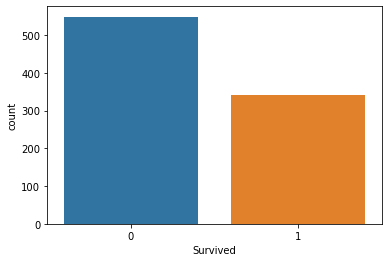

In [13]:
sns.countplot (Titanic['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

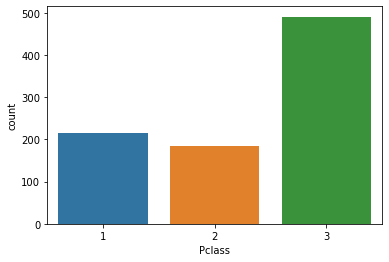

In [14]:
sns.countplot(Titanic['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

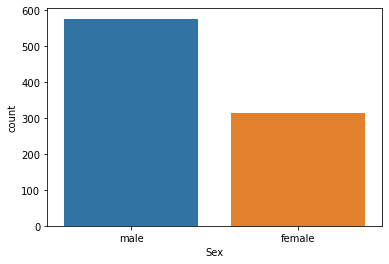

In [15]:
sns.countplot(Titanic['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

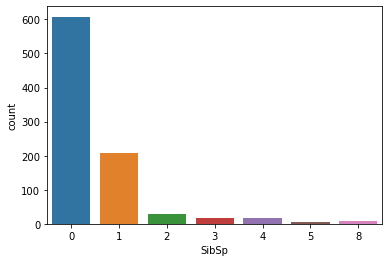

In [16]:
sns.countplot(Titanic['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

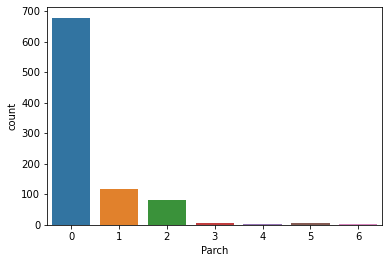

In [17]:
sns.countplot(Titanic['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

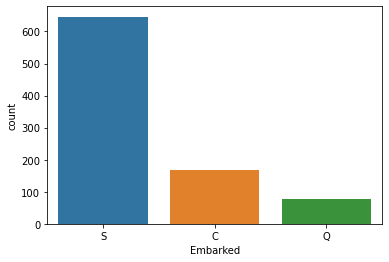

In [18]:
sns.countplot(Titanic['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

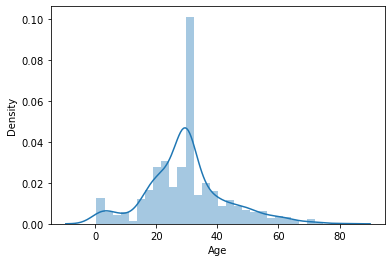

In [19]:
sns.distplot(Titanic['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

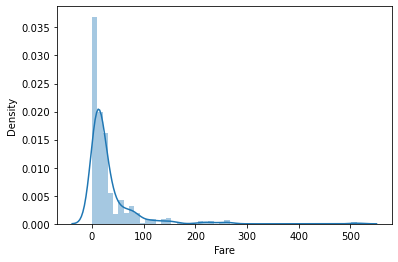

In [20]:
sns.distplot(Titanic['Fare'])

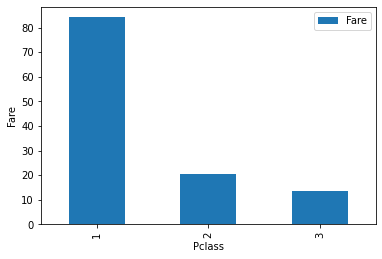

In [21]:
fare= Titanic.pivot_table(index='Pclass',values='Fare')
fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

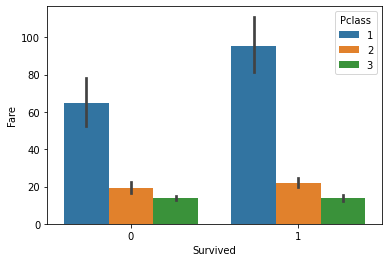

In [22]:
sns.barplot(data=Titanic,x='Survived',y='Fare',hue='Pclass')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

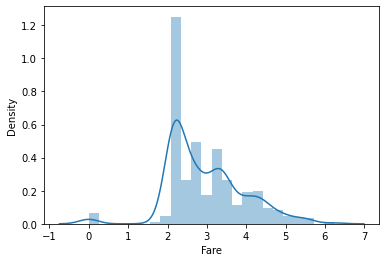

In [23]:
Titanic['Fare']=np.log(Titanic['Fare']+1)
sns.distplot(Titanic['Fare'])

<AxesSubplot:>

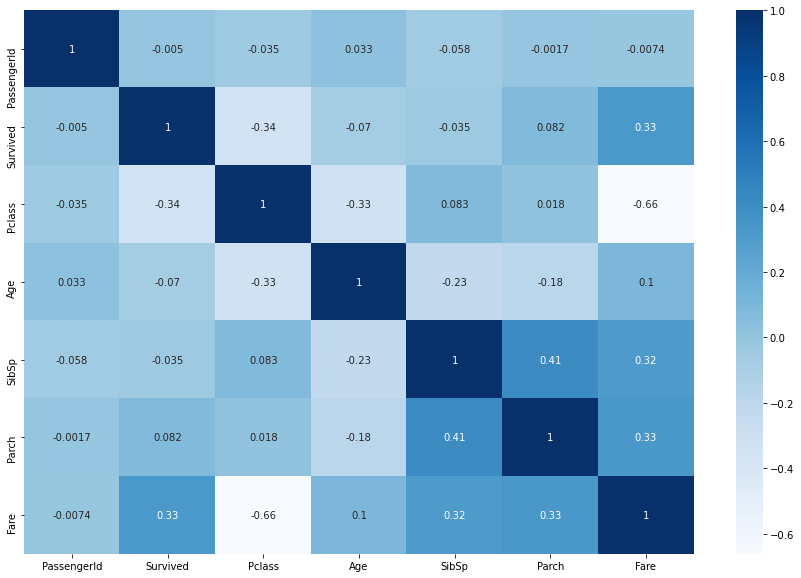

In [24]:
graph=Titanic.corr()
plt.figure(figsize=(15,10))
sns.heatmap(graph,annot=True,cmap='Blues')

In [25]:
#drop the extra columns
Titanic=Titanic.drop(columns=['Name','Ticket'],axis=1)
Titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C
2,3,1,3,female,26.0,0,0,2.188856,S
3,4,1,1,female,35.0,1,0,3.990834,S
4,5,0,3,male,35.0,0,0,2.202765,S


In [26]:
from sklearn.preprocessing import LabelEncoder 
colums=['Sex','Embarked']
le=LabelEncoder()

for col in colums:
    Titanic[col]=le.fit_transform(Titanic[col])
    
Titanic.head()    


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


In [27]:
x=Titanic.drop(columns='PassengerId')
y=Titanic['Survived']

In [28]:
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
def classify (model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)
    model.fit(x_train,y_train)
    print('Accuracy:',model.score(x_test,y_test))
    
    score=cross_val_score(model,x,y)
    print(score)
    print('CV Score:',np.mean(score))

In [38]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Accuracy: 1.0
[1. 1. 1. 1. 1.]
CV Score: 1.0
